## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from scipy.stats import shapiro
import statsmodels.api as sm

In [43]:
df_flights = pd.read_csv('Data/flights_table.csv')

In [ ]:
df_passengers = pd.read_csv('Data/passengers_table.csv')
df_fuel = pd. read_csv('Data/fuel_table.csv')

In [ ]:
df_flights.columns

In [ ]:
df_flights.isnull().sum()

In [ ]:
df_flights['arr_delay'].value_counts()

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [44]:
## Drop rows with missing arr_delay 
df_flights.dropna(subset=['arr_delay'], inplace=True)

Text(0.5, 0, 'Arrival delay')

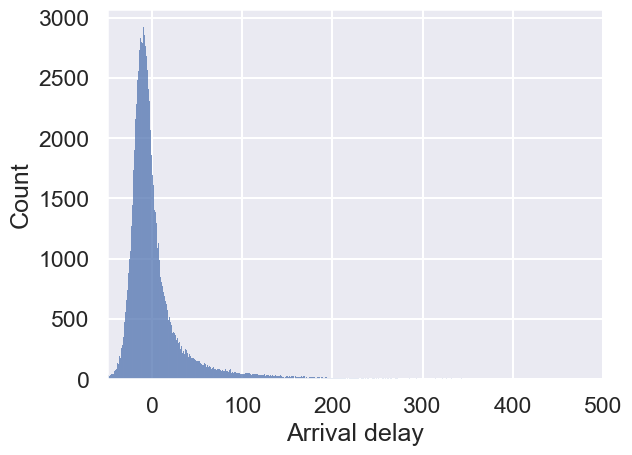

In [45]:
## Plot a graph
ax = sns.histplot(x=df_flights['arr_delay'])

ax.set_xlim(-50,500)

ax.set_xlabel("Arrival delay")

In [46]:
## Shapiro Wilk test
stat, p_value = shapiro(df_flights['arr_delay'])
p_value

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

Not normally distributed but that is without removing outliers

In [ ]:
## Remove outliers --> 	Using IQR Method
Q1 = df_flights['arr_delay'].quantile(0.25)
Q3 = df_flights['arr_delay'].quantile(0.75)
IQR = Q3 - Q1
iqr = df_flights['arr_delay'].quantile(0.75) - df_flights['arr_delay'].quantile(0.25)

In [ ]:
lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

In [ ]:
df_arr_delay = df_flights[(df_flights['arr_delay'] > lower_bound) & (df_flights['arr_delay'] < upper_bound)]

In [ ]:
## This dataframe now has arrival delay with outliers removed
df_arr_delay = df_arr_delay['arr_delay']

In [ ]:
## Plot a graph
ax = sns.histplot(x=df_arr_delay)

ax.set_xlim(-50,100)

ax.set_xlabel("Arrival delay")


In [ ]:
## Shapiro Wilk test
stat, p_value = shapiro(df_arr_delay)
p_value

Still Not Normally distributed

In [ ]:
## If we take a random sample?
arr_delay_sample = df_arr_delay.sample( n= 10000 )
stat, p_value = shapiro(arr_delay_sample)
p_value

In this case it is normally distributed

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
df_flights2 = df_flights[(df_flights['arr_delay'] > lower_bound) & (df_flights['arr_delay'] < upper_bound)]

In [ ]:
df_monthly_delay = df_flights[['fl_date','arr_delay']]

In [ ]:
## Convert fl_date to date time object so we can extract the Month
df_monthly_delay['fl_date'] = pd.to_datetime(df_monthly_delay['fl_date'])

In [ ]:
## Create new month column
df_monthly_delay['month'] = df_monthly_delay['fl_date'].dt.month

In [ ]:
df_monthly_delay.drop(columns = 'fl_date', inplace = True)

In [ ]:
df_monthly_delay

In [ ]:
df_monthly_delay.groupby('month', as_index = False).agg(['mean','median'])

In [ ]:
df_mean_delay = df_monthly_delay.groupby('month', as_index = False).mean()

In [ ]:
df_mean_delay

In [56]:
ax = sns.barplot(data=df_mean_delay, x='month', y='arr_delay')
 
##Labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Average Departure Delay (mins)')
ax.set_title('Avg Departure Delay per Month')

NameError: name 'df_mean_delay' is not defined

According to the mean, June, July and August had the highest delays.These are the summer months so we have the most amount of air travel in general, perhaps resulting in more delays

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [120]:
#Dataframe that contains scheduled arrival and departure times and taxi in and out
df_taxi = df_flights[['crs_arr_time', 'taxi_in', 'crs_dep_time', 'taxi_out']].dropna(axis=0)
df_taxi['arrival_hour'] = (df_taxi['crs_arr_time'])//100
df_taxi['departure_hour'] = (df_taxi['crs_dep_time'])//100

#Calculate average taxi times grouped by arrival and departure hour 
df_taxi_in = df_taxi[['arrival_hour', 'taxi_in']].groupby('arrival_hour', as_index = False).agg({'taxi_in':np.mean}).rename(columns={'taxi_in':'avg_taxi_in'})
df_taxi_out = df_taxi[['departure_hour', 'taxi_out']].groupby('departure_hour', as_index = False).agg({'taxi_out':np.mean}).rename(columns={'taxi_out':'avg_taxi_out'})

#Calculate number of flights by their arrival and departure hour 
df_taxi_in2 = df_taxi[['arrival_hour', 'taxi_in']].groupby('arrival_hour', as_index = False).agg({'taxi_in':np.size}).rename(columns={'taxi_in':'flights_in_number'})
df_taxi_out2 = df_taxi[['departure_hour', 'taxi_out']].groupby('departure_hour', as_index = False).agg({'taxi_out':np.size}).rename(columns={'taxi_out':'flights_out_number'})

Text(0.5, 1.0, 'Avg Taxi_in Time per Day hour')

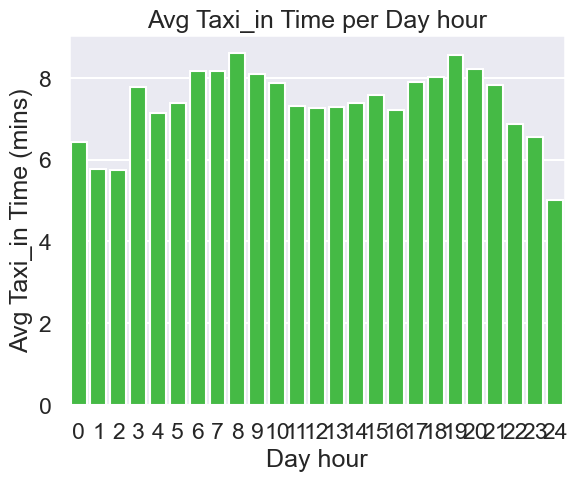

In [148]:
ax = sns.barplot(data=df_taxi_in , x='arrival_hour', y='avg_taxi_in', color = 'limegreen')
 
##Labels and title
ax.set_xlabel('Day hour')
ax.set_ylabel('Avg Taxi_in Time (mins)')
ax.set_title('Avg Taxi_in Time per Day hour')


Text(0.5, 1.0, 'Avg Taxi_in Time per Day hour')

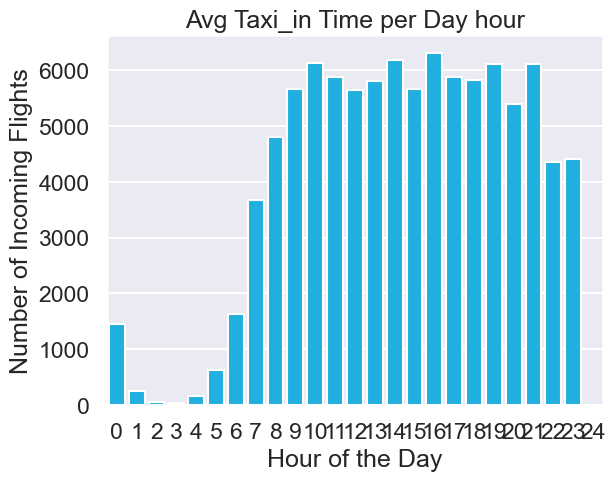

In [151]:
ax = sns.barplot(data=df_taxi_in2 , x='arrival_hour', y='flights_in_number', color='deepskyblue')
 
##Labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Incoming Flights')
ax.set_title('Avg Taxi_in Time per Day hour')

Text(0.5, 1.0, 'Avg Taxi_out Time per Day hour')

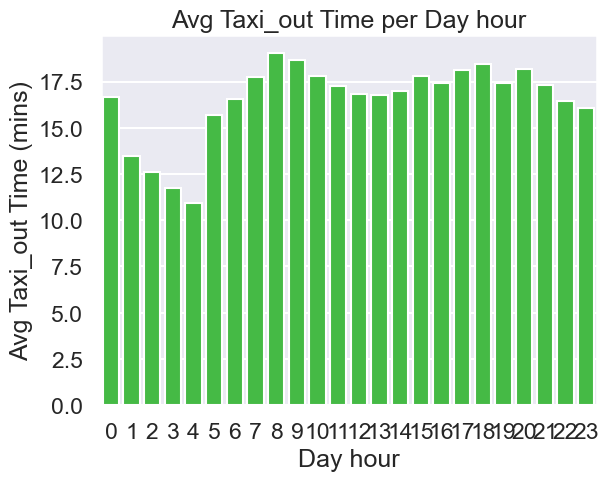

In [154]:
ax = sns.barplot(data=df_taxi_out , x='departure_hour', y='avg_taxi_out', color = 'limegreen')
 
##Labels and title
ax.set_xlabel('Day hour')
ax.set_ylabel('Avg Taxi_out Time (mins)')
ax.set_title('Avg Taxi_out Time per Day hour')

Text(0.5, 1.0, 'Avg Taxi_in Time per Day hour')

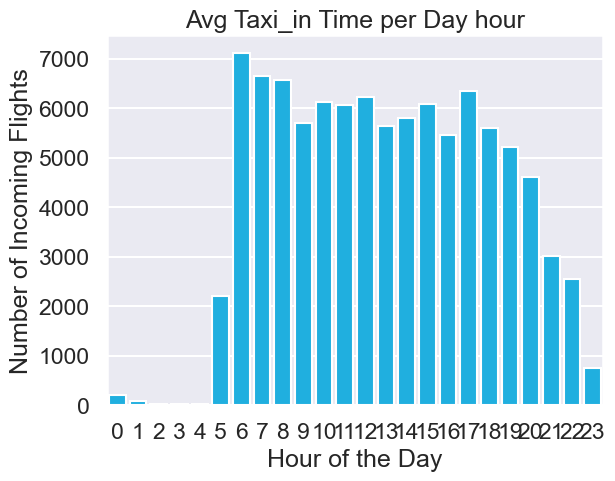

In [153]:
ax = sns.barplot(data=df_taxi_out2 , x='departure_hour', y='flights_out_number', color='deepskyblue')
 
##Labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Outgoing Flights')
ax.set_title('Avg Taxi_out Time per Day hour')

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [ ]:
num_arr_delays = df_flights[df_flights['arr_delay'] > 0]['arr_delay'].count()
num_dep_delays = df_flights[df_flights['dep_delay'] > 0]['dep_delay'].count()
print(num_arr_delays)
print(num_dep_delays)

In [ ]:
before_departure_percent = num_dep_delays / num_arr_delays * 100
print(before_departure_percent)

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [ ]:
df_flights_speed = df_flights
df_flights_speed['flight_speed'] = df_flights['distance'] / df_flights['air_time']

In [ ]:
df_dep_delay = df_flights_speed[df_flights['dep_delay'] > 0]
df_dep_delay.shape

In [ ]:
df_no_dep_delay = df_flights_speed[(df_flights['dep_delay'] == 0) | (df_flights['dep_delay'] < 0)]
df_no_dep_delay.shape

In [ ]:
avg_speed_delay = df_dep_delay['flight_speed'].mean()
avg_speed_nodelay = df_no_dep_delay['flight_speed'].mean()
print(avg_speed_delay)
print(avg_speed_nodelay)

In [ ]:
## Perform t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df_dep_delay['flight_speed'].dropna(), df_no_dep_delay['flight_speed'].dropna())

print(f'T-statistic: {t_stat}, p-value: {p_value}')

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

First going to check number of flights

In [ ]:
df_traffic = df_flights[['origin', 'dest']]

In [ ]:
## Create dataframe with count of flights from an airport
df_origin = df_flights.groupby('origin').size().reset_index(name='num_flights_from')
df_origin = df_origin.rename(columns = {'origin':'airport'})

In [ ]:
## Create dataframe with count of flights to airport
df_dest = df_flights.groupby('dest').size().reset_index(name='num_flights_to')
df_dest = df_dest.rename(columns = {'dest':'airport'})

In [ ]:
## Merge dataframes
df_traffic = pd.merge(df_origin,df_dest, on = 'airport')

In [ ]:
df_traffic.head()

In [ ]:
## Create new column with combined flights
df_traffic['total flights'] = df_traffic['num_flights_from'] + df_traffic['num_flights_to']

## Sort by top 10 based on flights
busiest_airports = df_traffic.sort_values(by = 'total flights', ascending = False)

busiest_airports.head(10)

Now lets check by number of passengers

In [ ]:
df_passengers.columns

In [ ]:
df_passengers.head()

In [ ]:
p_origin = df_passengers.groupby('origin')['passengers'].sum().reset_index(name='num_passengers_origin')
p_origin = p_origin.rename(columns = {'origin':'airport'})

In [ ]:
p_dest = df_passengers.groupby('dest')['passengers'].sum().reset_index(name='num_passengers_dest')
p_dest = p_dest.rename(columns = {'dest':'airport'})

In [ ]:
p_traffic = pd.merge(p_origin, p_dest, on = 'airport')

In [ ]:
p_traffic['total_passengers'] = p_traffic['num_passengers_origin'] + p_traffic['num_passengers_dest']

In [ ]:
passengers_busiest = p_traffic.sort_values(by = 'total_passengers', ascending = False)
passengers_busiest.head(10)

For the most part, number of flights does correspond to total number of passengers at a specific airport

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?